## Final Project 
Mary Duffner
DS4003
---

1. Description of data, url(s), metadata/provenance (where the dataset came from)

The data selected includes Spotify data of over 125 different genres and includes various identifying features of the tracks. I chose this dataset because of its large amount of data pulled. I am interested in most of the different columns, some being more focused on a casual listener, while other more specific columns like valence and tempo can provide great information for music professionals.  

URL: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

Provenance: This data was scraped by Hugging Face user @maharshipandya utilizing Spotify as their source of the data. This can be used to look at numbers behind songs, artist, and genres, and I will be utilizing it to classify based on various features and allow my users to look deeper into new tracks or even their favorites. While no specific use of the data is described, the user has scraped and cleaned the data using Spotify's API and Python. This dataset is open-ended and can be used in various ways, which will allow me to have users interact with their current music and also explore new tracks and genres through visualizations and interactivity. 

In [1]:
# import dependencies 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# reading in my data
df = pd.read_csv('dataset.csv')

# looking at the first 5 rows of data 
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Cleaning 

My dataset came relatively clean by the person who collected it. My steps were done to make this data more workable for my goals. I got rid of missing values to make the data consistent and I got rid of any columns I will not be utilizing. 

In [3]:
# seeing a bit more info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# here we see that there are a few missing values that we want to get rid of
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
# Here I am deleting the rows with missing values to ensure we have a full dataset 
df.dropna(inplace=True)

# Data looks good in terms of data types - there are no numbers mislabeled so I should be good with my categorical/numerical functions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [6]:
# Now I am going to drop any columns that I know I will not be using 
# Some are specific to my persona of a music professional, so I want to keep in most in order to provide information
# like accousticness and valence for those who are interested (not casual listeners)

df = df.drop(['track_id', 'duration_ms', 'mode', 'Unnamed: 0', 'liveness'], axis=1)

df.head()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.167,119.949,4,acoustic


In [7]:
# dropping duplicate songs
df = df.drop_duplicates(subset=['track_name'])

In [8]:
# dropping rows where popularity is 0 so the graphs have values
df = df[df['popularity'] != 0]

In [9]:
# making my cleaned and prepared dataset

df.to_csv('data.csv', index=False)

# Data Exploration

Here I am looking at my data to understand it better. I want to make sure it all makes sense and I know trends within the data. 

In [8]:
# looking into the numerical data a little bit more
df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,0.566801,0.641383,5.309126,-8.258950,0.084652,0.314907,0.156051,0.474066,122.147695,3.904034
std,22.304959,0.173543,0.251530,3.559999,5.029357,0.105733,0.332522,0.309556,0.259261,29.978290,0.432623
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.456000,0.472000,2.000000,-10.013000,0.035900,0.016900,0.000000,0.260000,99.218500,4.000000
50%,35.000000,0.580000,0.685000,5.000000,-7.004000,0.048900,0.169000,0.000042,0.464000,122.017000,4.000000
75%,50.000000,0.695000,0.854000,8.000000,-5.003000,0.084500,0.597500,0.049000,0.683000,140.071000,4.000000
max,100.000000,0.985000,1.000000,11.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000,5.000000


In [9]:
# lets look at distinct values in the genre column
# this function shows each genre in the dataset
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [10]:
# how many observations for each distinct value in the track_name column
# we have multiples but it is because the same song can be sung by various artists (popular songs like Run Rudolph Run)
df['track_name'].value_counts()

Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
                                 ... 
Jesteś Ideałem                      1
Eu Elevo                            1
Me tocó una luz                     1
Gaali Vaaluga                       1
Walking In The Forest               1
Name: track_name, Length: 73608, dtype: int64

In [11]:
# want to look how evenly distributed each genre is
# looks good just k-pop is one less track 
# want my user to have a large selection of tracks to look into
df['track_genre'].value_counts()

industrial     1000
dubstep        1000
r-n-b          1000
comedy         1000
synth-pop      1000
               ... 
world-music    1000
latin          1000
iranian        1000
funk           1000
k-pop           999
Name: track_genre, Length: 114, dtype: int64

# Categorical Variables

None of my categorical variables are hierarchical.

# Continuous Variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868acc3ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868ac4f1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868acc3760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868ac4f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868ac4fbe0>],
 'means': []}

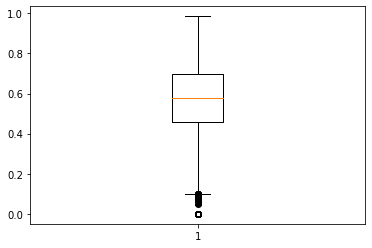

In [12]:
plt.boxplot(df.danceability)

# these values range from 0.0 - 1.0. Outliers will be useful to users

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868a8ef700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868a8efdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868a8ef3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868a8e34c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868a8e3820>],
 'means': []}

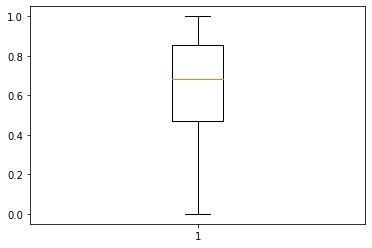

In [13]:
plt.boxplot(df.energy)

# no outliers!

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868ad87160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868ad87820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868a753dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868ad87ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868ad93280>],
 'means': []}

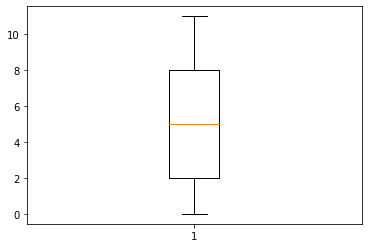

In [14]:
plt.boxplot(df.key)

# no outliers!

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868ae23b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868ae30280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868ae23820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868ae30940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868ae30ca0>],
 'means': []}

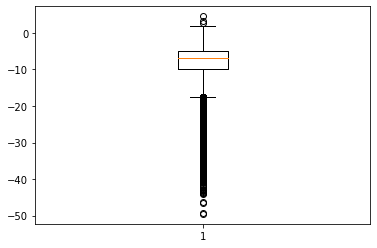

In [15]:
plt.boxplot(df.loudness)

# Outliers useful because each user can have a different preference for loudness

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868acc9400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868acc9ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868acc90a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868acd61c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868acd6520>],
 'means': []}

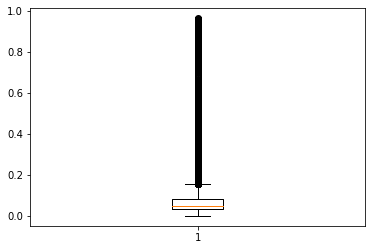

In [16]:
plt.boxplot(df.speechiness)

# outliers are useful because some users may prefer songs with lots of speech and others may prefer none at all

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868ad269d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868ad330d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868ad26670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868ad33790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868ad33af0>],
 'means': []}

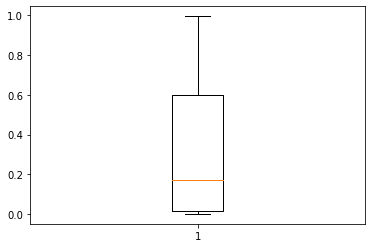

In [17]:
plt.boxplot(df.acousticness)

# no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868bb5fe80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868bb6d580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868bb5fb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868bb6dc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868bb6dfa0>],
 'means': []}

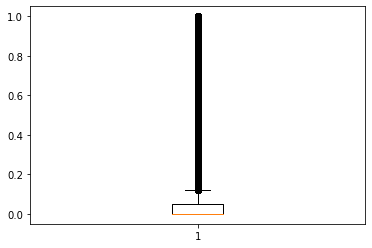

In [18]:
plt.boxplot(df.instrumentalness)

# outliers will be useful because some users may prefer lots of instrumentalness in a track 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868c73f400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868c73fac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868c73f0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868c7491c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868c749520>],
 'means': []}

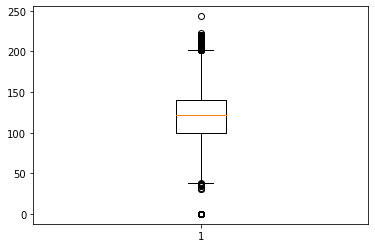

In [19]:
plt.boxplot(df.tempo)

# Outliers will be kept as they are useful to users in knowing whether a really high or low tempo impacts popularity or their preferences

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868c9148e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868c914fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868c914580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868c9216d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868c921a30>],
 'means': []}

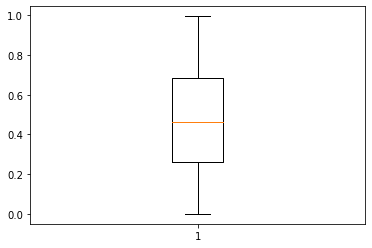

In [20]:
plt.boxplot(df.valence)

# no outliers

Outliers: I am going to keep all outliers because they can provide valuable insight for music professionals. If a song/genre has an extremely high or low valence, this can help them decide whether to utilize it themselves. Also, casual listeners may prefer songs/genres with extreme values in certain areas. 

(array([  629.,  2579.,  5525.,  9828., 17112., 23969., 24679., 18873.,
         9162.,  1643.]),
 array([0.    , 0.0985, 0.197 , 0.2955, 0.394 , 0.4925, 0.591 , 0.6895,
        0.788 , 0.8865, 0.985 ]),
 <BarContainer object of 10 artists>)

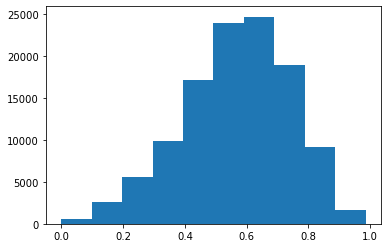

In [21]:
# let's check for normality in my continuous variables

plt.hist(df.danceability)

# pretty normally distributed - a little left-skewed

(array([ 3492.,  4318.,  5802.,  7606., 10616., 12900., 14820., 16352.,
        18406., 19687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

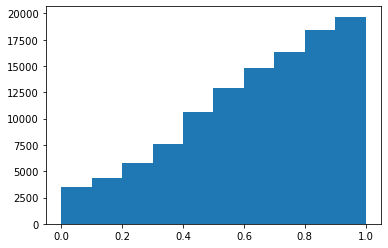

In [22]:
plt.hist(df.energy)

# left-skewed

(array([23833., 11644.,  3570.,  9008.,  9368.,  7921., 13244.,  7360.,
        11313., 16738.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

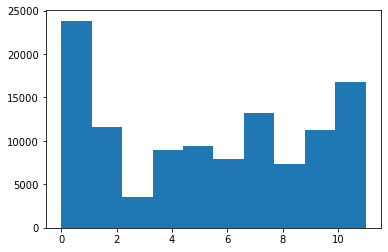

In [23]:
plt.hist(df.key)

# no consistent distribution

(array([4.0000e+00, 5.2000e+01, 2.6000e+02, 8.0400e+02, 1.7180e+03,
        3.8180e+03, 1.3029e+04, 4.6853e+04, 4.7104e+04, 3.5700e+02]),
 array([-49.531 , -44.1247, -38.7184, -33.3121, -27.9058, -22.4995,
        -17.0932, -11.6869,  -6.2806,  -0.8743,   4.532 ]),
 <BarContainer object of 10 artists>)

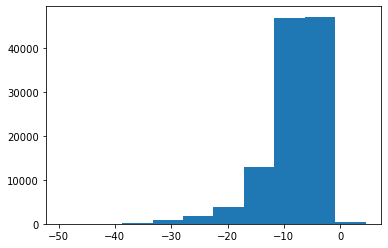

In [24]:
plt.hist(df.loudness)

# this shows a left-skewed distribution --> most values are right of the mean

(array([8.9856e+04, 1.4178e+04, 5.0530e+03, 2.5520e+03, 1.0720e+03,
        3.3100e+02, 8.3000e+01, 6.1000e+01, 9.9000e+01, 7.1400e+02]),
 array([0.    , 0.0965, 0.193 , 0.2895, 0.386 , 0.4825, 0.579 , 0.6755,
        0.772 , 0.8685, 0.965 ]),
 <BarContainer object of 10 artists>)

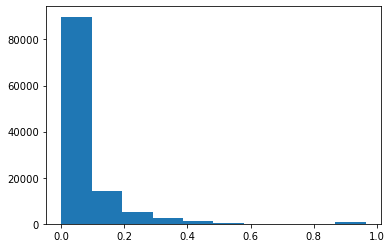

In [25]:
plt.hist(df.speechiness)

# very right-skewed --> most fall left of the mean 

(array([88003.,  2699.,  1709.,  1443.,  1285.,  1509.,  1810.,  2665.,
         6675.,  6201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

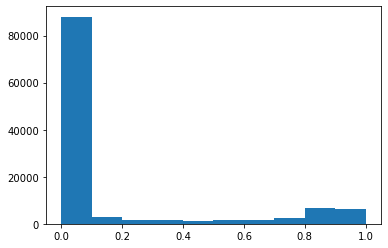

In [26]:
plt.hist(df.instrumentalness)

# right-skewed 

(array([48218., 11883.,  7771.,  6318.,  5822.,  5487.,  5867.,  6589.,
         6816.,  9228.]),
 array([0.    , 0.0996, 0.1992, 0.2988, 0.3984, 0.498 , 0.5976, 0.6972,
        0.7968, 0.8964, 0.996 ]),
 <BarContainer object of 10 artists>)

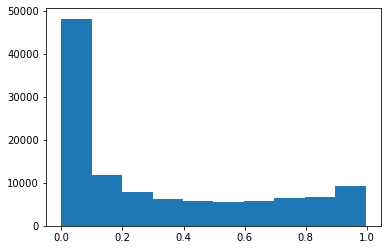

In [27]:
plt.hist(df.acousticness)

# right-skewed 

(array([ 8504., 11780., 13235., 14536., 13539., 13274., 12439., 10930.,
         8818.,  6944.]),
 array([0.    , 0.0995, 0.199 , 0.2985, 0.398 , 0.4975, 0.597 , 0.6965,
        0.796 , 0.8955, 0.995 ]),
 <BarContainer object of 10 artists>)

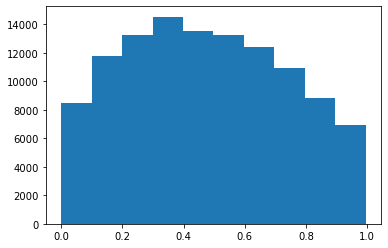

In [28]:
plt.hist(df.valence)

# pretty normal --> a big right skewed 

(array([1.5700e+02, 6.1000e+01, 2.5210e+03, 2.3823e+04, 2.9484e+04,
        3.4850e+04, 1.4262e+04, 7.7520e+03, 1.0780e+03, 1.1000e+01]),
 array([  0.    ,  24.3372,  48.6744,  73.0116,  97.3488, 121.686 ,
        146.0232, 170.3604, 194.6976, 219.0348, 243.372 ]),
 <BarContainer object of 10 artists>)

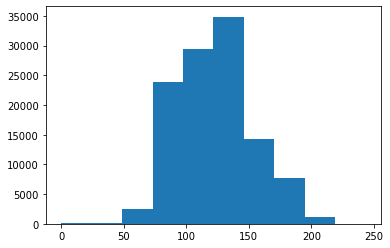

In [29]:
plt.hist(df.tempo)

# this shows a relatively normal distribution - the values tend to stay around the mean

Normality: here we used histograms to look at the normality of each of the continuous variables to understand how their values tend to fall (around the mean, left, or right).

# Markdown Section

Data Dictionary


| Column Name | Description |
| ----------- | ----------- |
| artists | Artist(s) who performed on the track (song) |
| album_name | Album name the song comes from |
| track_name | Name of the song |
| popularity | Value from 0 to 100 based on total number of plays and how recent they are |
| explicit | Whether or not the song is explicit (yes or no)|
| danceability | Value ranging from 0.0 to 1.0 based on how suitable the song is for dancing based on tempo, rhythm stability, beat strength, and regularity |
| energy | Value ranging from 0.0 to 1.0 based on intensity and activity. Energetic songs are faster, louder, and noisier |
| key | Key the song is in in standard Pitch Class notation (for those who read music) |
| loudness | Loudness of the song in decibels |
| speechiness | Value from 0.0 to 1.0. Detects the presence of speech in the song. The higher the values, the more likely the track is made only of words (podcast or poetry) |
| acousticness | Value from 0.0 to 1.0 based on how acoustic the track is |
| instrumentalness | Value ranging from 0.0 to 1.0 based on whether the track contains no words. A value closer to 1.0 contains less vocal content |
| valence | Value from 0.0 to 1.0 describing how positive (happy) the track is |
| tempo | Estimated tempo in beats per minute - looks at speed of the track |
| time_signature | Estimated time signature - how many beats are in each measure (ranges from 3 to 7) |
| track_genre | Genre the track falls in |

Brainstorm UI components 

- Chainlinked callback with user able to select their preferences to see songs within that selection (preferences in loudness, genre, etc.)
- Color scheme for genres based on what emotions they evoke (higher valence --> more vibrant colors)
- Navigation bar to allow users to easily navigate through
- Dropdown or radio items to allow user to select multiple preferences in their music with clearly labeled buttons
- Dropdown/typed selection of user's favorite song to show statistics on it in visualizations

Brainstorm data visualization

- Scatter plot of danceability vs energy which allows the user to filter on genre or song 
- Bar graph of loudness, tempo, speechiness by song or genre (based on dropdown/radio item selections)
- Professional vs casual listener graph showing popularity of song based on user selections (valence, tempo, genre, etc)
- Favorite song visuals - scatter plots of 2 numericals of choice by user and they can select favorite song in dropdown search
- Line graph with two selected numerical variables with lines by song (may be too many) or genre 